In [49]:
0.45/np.sqrt(2)


0.31819805153394637

# Recitation class


# Import all necessary libraries and magics



In [2]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import math

### Exam Details

All exams will have 2 parts:

**<font color=blue>Part 1 - Analytical.</font>**
* You are allowed 1-page letter-sized front and back of formulas (handwritten or typed).
* You are allowed a scientific calculator.
* **<font color=orange>TOTAL TIME:</font>** 50 minutes
 

**<font color=blue>Part 2 - Simulation.</font>**
* Bring the computer you have been using with Anaconda installed.
* This part is open-book. You are allowed access to the textbooks and lecture materials (including assignments).
* You are allowed to use the internet, if needed.
* *Recommended*: create a python "cheat sheet" where you will add useful functions, simulations and other Python implementations.
* **<font color=orange>TOTAL TIME:</font>** 50 minutes

**<font color=red>Communications between students or anyone else during the exam is considered cheating. Turn off all Slack notifications and other communications channels!</font>**

## Exam 3 Coverage

Exam 3 will cover all materials from Lectures 10 onwards. These include:

1. **Hypothesis Testing**
    * Z-test, T-test, 
    * Test of the difference in mean.
     
2. **Vectors, Covariance, and Linear Regress**
    * Vector inner product, norm, projection, meaning of projection.
    * Least square, linear regression. 
    * Matrix vector product, rotation of coordinates.
    * Principal component analysis. Spree plot. Explained variance vs total variance.
    * Python implementation.

## How to prepare for exam

**This is a suggestion only.**

1. Review/read all Notebooks and homeworks (2/3 questions will be selected from homework assignments, in-lecture examples, recitations.)

2. Create your formula sheet for part 1. 

3. Solve practice problems provided in the recitation class.

In [3]:
import numpy as np
import numpy.random as npr
import pandas as pd
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


# Question 1


In an honors program, we want to determine if the mean IQ score of 30  students in the honors program differ from the general population.   The general population’s IQ scores are tested for 200 students as having a mean of 100 and a standard deviation of 15. 
 
The mean IQ scores of students in the honors program is  107 with std of 9. Based on this result, will you reject the null hypothesis H0: ``There is no difference between the IQ score of students in the honors program and the general population''? with 0.05 level of significance?




**Soln**: Testing the difference of the means:


$$T = \hat\mu_X- \hat \mu_Y$$
- $X$, $Y$ have unknown and unequal variance.
- have sample mean and sample std for both population.

1. calculate the standard error of the difference of two sample means:

$$S_d= \sqrt{S_x^2/n_x + S_y^2/n_y} = \sqrt{15^2/200 + 9^2/30}$$

2. because the sample size is greater than 30, 

$$T\sim N(0, S_d)$$

3. $P(T> 7|H_0)$ using one-sided T-test

In [4]:
Sd= np.sqrt(15**2/200 + 9**2/30)
Sd

1.9557607215607946

In [5]:
T= stats.norm(0, Sd)
T.sf(7)

0.00017234363483649442

Conclusion: with 0.05 level of signifance, we reject the null hypothesis.

# Question 2


A manufacturer of a patent medicine claims that it was 90\% effective in relieving an allergy  for 24 hours. In a sample of 100 people who had the allergy, the medicine provides relief for 80 people.

Determine if the company's claim is legitimate given 0.01 as the level of significance.




Soln: 
    Let $X_i$ be the random variable for if the medicine is effective for $i$-th patient.

The distribution of $X_i$ is a Bernoulli $X_i \sim Bernoulli (p)$ where $p=0.9$

- The expectation of $X_i$ is $\mu_X = p=0.9$
- The variance of $X_i$ is $\sigma^2_X=p(1-p) = 0.09$



Assume the null hypothesis is true.

the distribution $S_n = \sum_{i=1}^{100} X_i \sim N(100*\mu_X, \sqrt{n *\sigma^2_X}) = N(90, 3)$

$$P(S_n<80)$$

In [6]:
Sn = stats.norm(90,3)
Sn.cdf(80)

0.0004290603331968372

because the probability of observing these outcomes is smaller than 0.01, we reject the null hypothesis

# Question 3

Let $X_1,\ldots X_n$ be denote the independent, identically distributed, random variables for a random sample of size $n$. The distribution of $X_i$ has a mean $\mu_1$ and std $\sigma_1$.

Let $Y_1,\ldots Y_m$ be denote the independent, identically distributed, random variables for a random sample of size $m$. The distribution of $Y_i$ has a mean $\mu_2$ and std $\sigma_2$.


 
Derive the mean and variance of 

* $X_1+X_2+\ldots +X_n -( Y_1 + Y_2 + \ldots + Y_m)$.

* $\bar X - \bar Y$ where $\bar X = \frac{X_1+X_2+\ldots +X_n}{n}$ and $\bar Y = \frac{Y_1+Y_2+\ldots +Y_m}{m}$. 


- $$E(X_1+X_2+\ldots +X_n -( Y_1 + Y_2 + \ldots + Y_m)) = n \mu_1-m \mu_2$$

- $$Var(X_1+X_2+\ldots +X_n -( Y_1 + Y_2 + \ldots + Y_m)) = n \sigma_1^2 + m \sigma_2^2 $$

- $$E(\frac{X_1+X_2+\ldots +X_n}{n} -\frac{( Y_1 + Y_2 + \ldots + Y_m)}{m}) = \mu_1- \mu_2$$

- $$Var(\frac{X_1+X_2+\ldots +X_n}{n} -\frac{( Y_1 + Y_2 + \ldots + Y_m)}{m}) = \frac{1}{n}\sigma_1^2 + \frac{1}{m} \sigma^2_2$$


# Question 4

Prove if X and Y are independent Random variable, then their covariance must be zero.

# Question 5

Answer the following questions. For each one, justify your answer with reasoning or a brief explanation.
1.   Let $ A $ be a matrix of size $ 3 \times 2 $ and $ \mathbf{x} $ be a vector of size $ 2 \times 1 $.  
   Can you compute $ A\mathbf{x} $? What is the size of the result?
 
2.   Let $ A \in \mathbb{R}^{m \times n} $ and $ \mathbf{x} \in \mathbb{R}^{n} $.  
   What is the size of $ A\mathbf{x} $? Why?

 
3.  Let $ B \in \mathbb{R}^{4 \times 5} $ and $ \mathbf{y} \in \mathbb{R}^{4 \times 1} $.  
   Can you compute $ B\mathbf{y} $? Why or why not?

 

4.  Let $ C \in \mathbb{R}^{n \times n} $ be a square matrix and $ \mathbf{v} \in \mathbb{R}^n $.  
   What is the result of $ C\mathbf{v} $, and what does it represent geometrically?

 

5. Suppose $ D \in \mathbb{R}^{3 \times 4} $ and you want to compute $ \mathbf{v}^T D $, where $ \mathbf{v} \in \mathbb{R}^3 $.  
   Is this multiplication valid? Why or why not?



# Question 6


Let $ \mathbf{x} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ .  
Rotate the coordinate counterclockwise by $  \theta $ . What is the new coordinate? What is the rotation matrix? Explain your answer using the variable $\theta$.



$$ \mathbf{x} = \begin{bmatrix} 2 \\ \sqrt{3} \end{bmatrix} $$.  Rotate the coordinate clockwise by $  \theta $
What is the new coordinate? What is the rotation matrix? Explain your answer using the variable $\theta$.


# Question 7


Let $$ \mathbf{u} = \begin{bmatrix} 3 \\ -1 \\ 2 \end{bmatrix} $$ and $$ \mathbf{v} = \begin{bmatrix} 1 \\ 4 \\ -2 \end{bmatrix}. $$   

- Compute the inner product  $ \mathbf{u}^\top \mathbf{v} $.

- Compute the projection of $\mathbf{u}$ to $\mathbf{v}$ and the projection of $\mathbf{v}$ to $\mathbf{u}$.


# Question 8

Explain how the inner product relates to the angle between two vectors.  
What does it mean if $  \mathbf{u}^\top \mathbf{v} = 0 $ ?

# Question 9

The matrix $
A = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$ have two eigenvalues $\lambda_1=1$ and $\lambda_2= 3$. Compute the eigenvectors and write $A = U \Lambda U^{-1}$ --- the diagonal decomposition of $A$. 


# Question 10 (mixture of handwritten and programming part)

A company advertises that its new smartwatch has an average battery life of 36 hours on a full charge. You suspect this is an overestimate and conduct your own tests. After testing 5 watches, you observe the following battery lives (in hours):

$[34.5,\ 36.0,\ 35.2,\ 33.8,\ 34.9]$


1. (3 points) Compute the unbiased sample mean and unbiased sample variance for the battery life.


2. (6 points) Suppose that the true variance $\sigma^2$ is unknown. Answer the following questions:

    a) Test the hypothesis $\mu = 36$ at 95\% confidence using a one-sided  t-test. What is your conclusion?
    
    b) Determine the range of sample means for which the null hypothesis $\mu = 36$ is accepted with 95% confidence.


3. (6 points) You then find an internal report claiming the true variance is $\sigma^2 = 0.49$.

    a) Test the hypothesis $\mu = 36$ at 95\% confidence using a one-sided z-test. What is your conclusion?
    
    b) Determine the range of sample means for which the null hypothesis is accepted with 95% confidence.
    
    
4. (3 points) Compare your conclusions from parts 2 and 3. Are they the same? Why or why not? What happens to your conclusion as you increase the number of samples?

In [8]:
x= np.array([34.5, 36.0, 35.2, 33.8, 34.9])
mean = x.mean()
var = np.var(x, ddof=1)
mean, var

(34.88, 0.667000000000002)

In [9]:
T = stats.t(df=len(x)-1)
t = (36- mean)/np.sqrt(var/5)
t

3.0664797978829923

In [10]:
T.sf(t)

0.018710582754197888

In [15]:
# two-sided 
2*T.sf(t) # compare with the threshold.

0.037421165508395776

In [ ]:
# can reject the null hypothesis

In [13]:
# 3.
t2= (36-mean)/np.sqrt(0.49/5)
t2

3.5777087639996554

In [14]:
stats.norm().sf(t2)

0.0001733096755673388

# Question 11

The file ```coffee_prices.csv``` contains the price and review ratings of coffee in walmart stores around the country. We want to determine whether highly rated coffees tend to be more expensive. 

**Answer the following questions.**
1. (2 point) Load the csv file into a dataframe using pandas, and print the first five rows.
2. (3 points) Extract the ```rating``` column and the ```price_per_kg``` column. Plot a scatter plot with price per kg on the x-axis and rating on the y-axis. Plot the coffees whose ratings are above 4.5 in a different color than the ones whose ratings are below or equal to 4.5.
3. (4 points) Define the two variables of interest: the coffee prices whose ratings are above $4.5$ as ```x```, and the coffee prices whose ratings are below or equal to $4.5$ as ```y```. Plot a histogram of the prices of the highly-rated coffee population. Overlay this with the histogram of the prices of low-rated coffees. The two histograms should have the same bins.
4. (5 points) Compute the sample mean estimators and the unbiased sample variance estimators for each variable, ```x``` and ```y```.
5. (6 points) Build a hypothesis test to test the difference-of-means for the two variables. Include the description for $H_0$ and $H_1$, and a conclusion for a significance level $\alpha=0.01$.

In [16]:
df=pd.read_csv('coffee_prices.csv')
df.head()

,title,coffee_type,rating,reviews,price_per_kg
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,12.183807
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,13.262787
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,13.577557
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,8.233048
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,7.333921


In [17]:
rating = df['rating'].to_numpy()
price_per_kg = df['price_per_kg'].to_numpy()
rating, price_per_kg

(array([3.8, 4.7, 4.4, ..., 4.3, 4.5, 4.3]),
 array([12.18380744, 13.2627866 , 13.57755686, ..., 38.15402704,
        28.41109508,  4.77793811]))

In [18]:
rating>4.5

array([False,  True, False, ..., False, False, False])

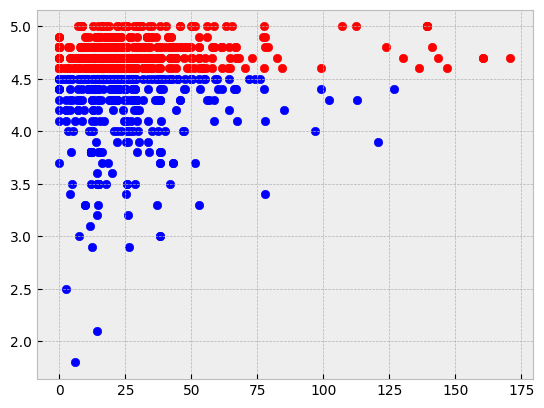

In [19]:
plt.scatter(price_per_kg[rating>4.5], rating[rating>4.5], c='r')
plt.scatter(price_per_kg[rating<=4.5], rating[rating<=4.5], c='b')

___

___

In [20]:
x = price_per_kg[rating>4.5]
y = price_per_kg[rating<=4.5]


In [21]:
muX = x.mean()
muY =y.mean()

In [22]:
diff = muX - muY
diff

2.0149412129654998

In [23]:
# test if two coffees with different ratings have the same average cost per kg
varX = np.var(x, ddof=1)
varY =np.var(y,ddof=1)
diff_var = varX/len(x)+varY/len(y)
diff_std =np.sqrt(diff_var)
diff_std

1.1831915347744837

In [24]:
len(x), len(y)

(773, 451)

In [25]:
G0=stats.norm()

In [26]:
t_coffee = diff/diff_std

In [27]:
# one-sided alpha=0.01
G0.sf(t_coffee) 

0.04428672077370842

In [28]:
# cannot reject the null hypothesis

# Question 12

**Combined Cycle Power Plant Data Set** obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).

The dataset contains 9568 data samples collected from a Combined Cycle Power Plant (CCPP) over 6 years (2006-2011), when the power plant was set to work with full load. 

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

The *goal* is to predict the net hourly electrical energy output (PE) of the plant using a different set of features (or variables), in particular, hourly average of:

* Ambient Temperature (AT),
* Ambient Pressure (AP),
* Relative Humidity (RH), and 
* Exhaust Vacuum (V).

In [29]:
import pandas as pd
Data = pd.read_csv('PowerPlant.csv')
Data

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


1.  Perform linear regression given x=Ambient Temperature (AT) and y= the net hourly electrical energy output (PE).

In [30]:
x = Data['AT'].to_numpy()
y = Data['PE'].to_numpy()

In [31]:
regress = stats.linregress(x,y)
regress

LinregressResult(slope=-2.1713199585177922, intercept=497.03411989276674, rvalue=-0.9481284704167592, pvalue=0.0, stderr=0.00744328712565797, intercept_stderr=0.15643382142090134)

2. Evaluate if there is significant relationship between the ambient temperature and the PE? Justify your reasoning.

In [32]:
np.corrcoef(x, y)

array([[ 1.        , -0.94812847],
       [-0.94812847,  1.        ]])

3. Center the data first.


In [35]:
X_all = Data[['AT', 'V','AP', 'RH']].to_numpy()
X_all

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [38]:
X_all.mean(axis=0)

array([  19.65123119,   54.30580372, 1013.25907818,   73.30897784])

In [39]:
X_c = X_all - X_all.mean(axis=0)
X_c

array([[-11.31123119, -13.53580372,  -2.41907818,  16.70102216],
       [  3.98876881,   4.18419628,  -1.85907818,   0.89102216],
       [ 10.08876881,   2.59419628,  -6.10907818, -31.39897784],
       ...,
       [ -3.66123119, -10.96580372,   0.94092182,   5.35102216],
       [ -2.00123119,   5.56419628,   5.32092182,  21.34102216],
       [  4.02876881,  -3.00580372,  -1.39907818,  -2.06897784]])


4. In this data set, since  the AT (temperature) is in °C (range 0–40), and Ambient Pressure (AP), is in millibars (range ~1000), we need to perform a normalization of the data so that they have the same scale.

The scaling of data is performed by  dividing the feature value by the standard deviation of each feature (so std = 1). Next, please scale the data.


In [41]:
X_c_scaled = np.zeros(np.shape(X_c))
for i in range(4):
    X_c_scaled[:,i] = X_c[:,i]/np.std(X_c[:,i], ddof=1)
X_c_scaled

array([[-1.5177822 , -1.06514933, -0.40733563,  1.14388457],
       [ 0.53522753,  0.32925964, -0.31304022,  0.06102779],
       [ 1.35374774,  0.20414055, -1.02867497, -2.15057533],
       ...,
       [-0.49127733, -0.86291282,  0.15843679,  0.36650162],
       [-0.26853249,  0.43785357,  0.89596154,  1.46168694],
       [ 0.54059487, -0.23653046, -0.23558329, -0.1417082 ]])

5. After you obtain the center and scaled data, compute the covariance matrix. Explain what features is most correlated with AP.

In [43]:
K=np.cov(X_c_scaled.T)
K

array([[ 1.        ,  0.84410673, -0.50754934, -0.54253465],
       [ 0.84410673,  1.        , -0.41350216, -0.31218728],
       [-0.50754934, -0.41350216,  1.        ,  0.09957432],
       [-0.54253465, -0.31218728,  0.09957432,  1.        ]])

6. Perform PCA and project the data to top two principal components.

In [44]:
import numpy.linalg as LA

In [46]:
la, U = LA.eig(K)
la

array([2.4385618 , 0.10256388, 0.55000398, 0.90887034])

In [ ]:
U

In [50]:
la_sorted_indices = np.argsort(la)[::-1]  # Indices of eigenvalues in descending order
la_sorted_indices

array([0, 3, 2, 1])

In [52]:
U_sorted = U[la_sorted_indices]
U_sorted
la_sorted= la[la_sorted_indices]

7. How much variance is explained by the top two PCs?

In [53]:
np.sum(la_sorted[:2])

3.347432138627862

In [54]:
np.sum(la_sorted[:2])/np.sum(la_sorted)

0.8368580346569653

84% variance is explained by the top two PCs.

8. [**not to be included in the exam.**] After projecting your data onto the first two principal components, how would you reconstruct an approximation of the original data? 

In [56]:
X_projected = X_c_scaled.dot(U_sorted[:,:2])
X_projected

array([[ 0.2778451 , -2.14519548],
       [ 0.36419962,  0.41422515],
       [-0.03340152,  2.16849134],
       ...,
       [ 0.16807533, -0.7801642 ],
       [ 0.12389318, -0.79952255],
       [ 0.43846297,  0.40311535]])

In [57]:
# to recover the data after projection. X_projected is data in the new coordinates for the first two PC
# we fill out X_projected with two other zero columns 
X_full =   np.zeros(np.shape(X_c_scaled))
X_full[:,:2] = X_projected


In [59]:
# recall for each data X_c_scaled @ U_sorted = X_new_coord
# Let Z be the data in the old coordinate and X_full is the same data Z in the new coordinates
Z = X_full @ LA.inv(U_sorted)

 each data in Z is obtained after a centering and scaling, 
$$z^{(i)}[j] = (x^{(i)}[j]- \mu_j)/\sigma_j$$
where $\mu_j$ and $\sigma_j$ is the mean and std of the $j$-th feature
so 
$$
x^{(i)}[j] = z^{(i)}[j]*\sigma_j+\mu_j
$$

In [63]:
X_approx = np.zeros(np.shape(Z))
for i in range(4):
    X_approx [:,i] = Z[:,i]*np.std(X_c[:,i], ddof=1)
X_approx = X_approx + X_all.mean(axis=0)
X_approx

array([[   8.62650095,   46.12137045, 1010.7475994 ,   93.41810025],
       [  23.69458336,   53.86144775, 1012.74103496,   72.84048903],
       [  31.92952136,   61.38002572, 1015.20383219,   55.00361086],
       ...,
       [  15.94887732,   51.00449825, 1012.18481031,   81.16998519],
       [  15.63546415,   51.1568788 , 1012.27421867,   80.96992714],
       [  23.97115995,   53.46618492, 1012.55322247,   73.53971881]])

In [64]:
mse= np.mean((X_all - X_approx) ** 2)
mse # the mean squared error after reconstruction

49.65965910903198

9. Plot the scree plot of explained variance by top k PCs and the total variance of the data.

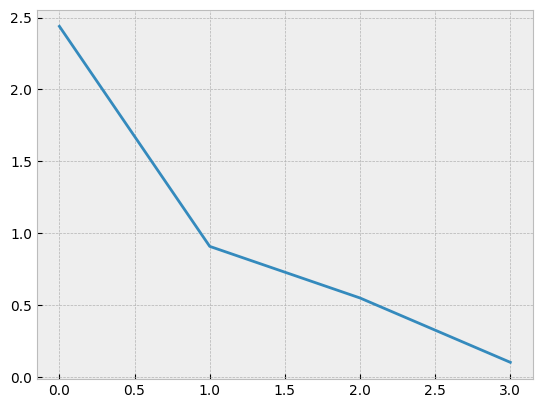

In [67]:

plt.plot(la_sorted)


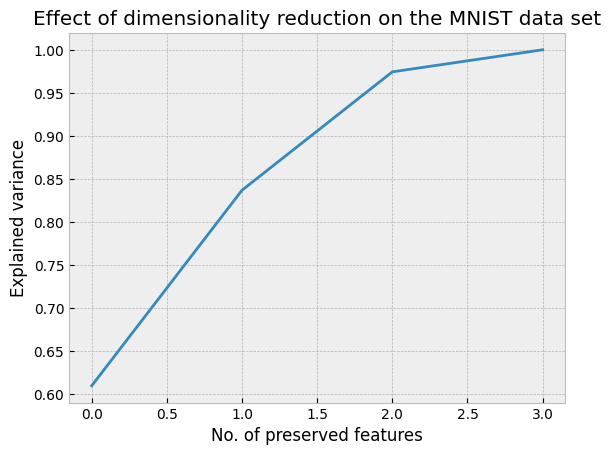

In [69]:
total_variance_cumsum = la_sorted.cumsum()

total_variance_all = np.sum(la_sorted)
plt.plot(total_variance_cumsum/total_variance_all)
plt.xlabel('No. of preserved features')
plt.ylabel('Explained variance')
plt.title('Effect of dimensionality reduction on the MNIST data set');